# 直线回归

In [2]:
import numpy as np

## 最小二乘法

In [3]:
def ordinaryLeastSquares(X,Y):
    # 最小二乘法的原理是尽可能使得观察值y'与真实值y的偏差量小，使用偏差的平方和作为标准，平方和求导为0时平方和最小，求出此时拟合直线斜率和截距即可
    k=(len(X)*sum(X*Y)-sum(X)*sum(Y))/(len(X)*sum(X*X)-sum(X)**2)
    b=Y.mean()-k*X.mean()
    return k,b

身高：143,145,146,147,149,150,153,154,155,156,157,158,159,160,162,164
腿长：88,85,88,91,92,93,93,95,96,98,97,96,98,99,100,102

In [4]:
X=np.array([143,145,146,147,149,150,153,154,155,156,157,158,159,160,162,164])
Y=np.array([88,85,88,91,92,93,93,95,96,98,97,96,98,99,100,102])


In [5]:
k,b=ordinaryLeastSquares(X,Y)
k,b

(0.7193521935219352, -16.0729807298073)

In [6]:
neo_X=np.array([165])
neo_Y=k*neo_X+b
neo_Y

array([102.6201312])

## 多元线性回归

1. 对参数进行点估计，求出回归方程
2. 对参数，模型进行检验
3. 对y做点估计

In [7]:
# 多元线性回归模型的参数估计
def regression(X,Y):
    return np.dot(np.linalg.inv((np.dot(np.transpose(X),X))),(np.dot(np.transpose(X),Y)))


In [8]:
x=np.array([[1,3,4,6],[3,2,5,3],[9,7,5,6]])
y=np.array([[1],[3],[6]])
beta=regression(x,y)
test_x=np.array([1,2,3,4])
test_y=np.dot(test_x,beta)
test_y,beta

(array([1.75]),
 array([[-1.5 ],
        [ 4.  ],
        [-0.25],
        [-1.  ]]))

# 非线性回归

配曲线
- 画出散点图
- 估计曲线类型
- 估计位置参数  
估计位置参数方法：转换为线性函数，用线性回归方法求得参数

## 多项式回归


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据集
datas=pd.read_csv('data.csv') 
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [10]:
X=datas.iloc[:,1:2].values # 该方法返回的是第一列，并且为列向量
Y=datas.iloc[:,2].values # 该方法返回第二列，但是结果为标量（一维数组）
X,Y

(array([[  0],
        [ 20],
        [ 40],
        [ 60],
        [ 80],
        [100]], dtype=int64),
 array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01]))

### 使用线性回归和多项式回归拟合数据

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# LinearRegression
lin=LinearRegression()
lin.fit(X,Y)

# PolynomialRegression
poly=PolynomialFeatures(degree= 4) #最高次数为4
X_poly=poly.fit_transform(X)
poly.fit(X_poly,Y)
lin2=LinearRegression()
lin2.fit(X_poly,Y)
X_poly

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+01, 4.000e+02, 8.000e+03, 1.600e+05],
       [1.000e+00, 4.000e+01, 1.600e+03, 6.400e+04, 2.560e+06],
       [1.000e+00, 6.000e+01, 3.600e+03, 2.160e+05, 1.296e+07],
       [1.000e+00, 8.000e+01, 6.400e+03, 5.120e+05, 4.096e+07],
       [1.000e+00, 1.000e+02, 1.000e+04, 1.000e+06, 1.000e+08]])

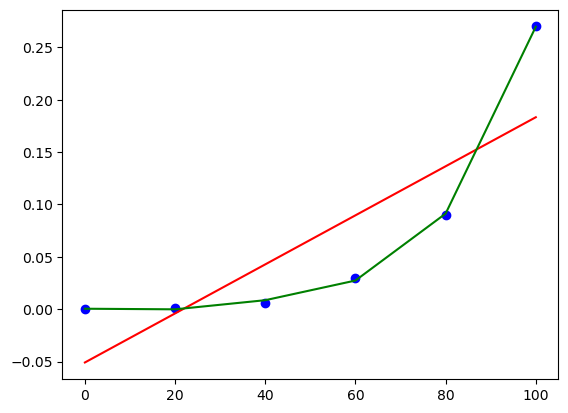

In [12]:
plt.scatter(X,Y,color='blue')
plt.plot(X,lin.predict(X),color='red')
plt.plot(X,lin2.predict(poly.fit_transform(X)),color='green')

plt.show()

可以注意到，多项式回归比线性回归更符合散点的分布

In [13]:
pred_1=lin.predict([[110]])
pred_2=lin2.predict(poly.fit_transform([[110]]))
pred_1,pred_2

(array([0.20675333]), array([0.43295877]))

In [6]:
import pandas as pd
df=pd.read_csv('./wine_quality/winequality-red.csv',sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


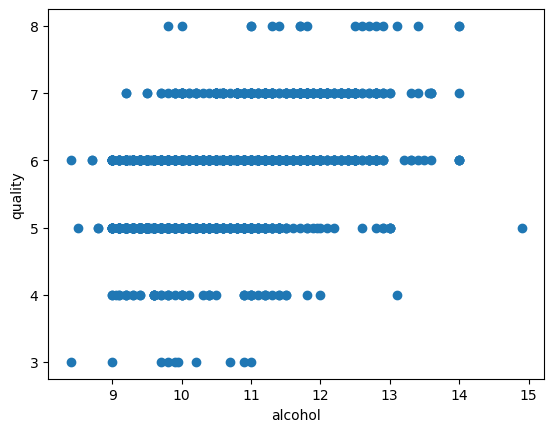

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['alcohol'],df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

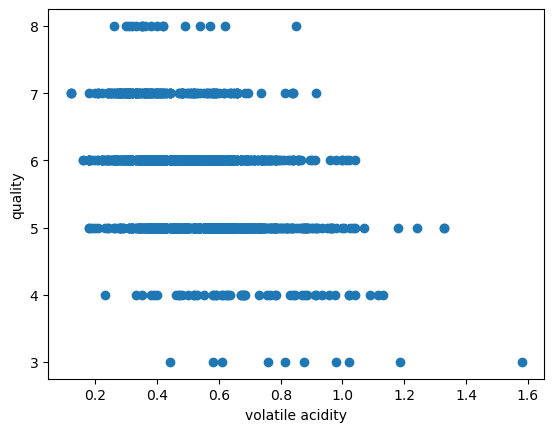

In [8]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

使用线性回归测试

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df[list(df.columns[:-1])]
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(f'score is {regressor.score(X_test,y_test)}')

score is 0.3924670909924284


C:\Users\diomedes\.conda\envs\pyCharm\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 11 features, but LinearRegression is expecting 4368 features as input.